## SCRAPING SITO DEL CENTRO RICERCA IN DATA SCIENCE POLITO

* **DALLA HOME CERCO LA LISTA DI PAGINE DEL SITO COLLEGATE**
* **SCARICO IL CONTENUTO ULITE; CIOè SOLO IL TESTO DI TUTTE LE PAGINE**
* **PULIZIA DEI TESTI + PAROLE FREQ**

In [1]:
from bs4 import BeautifulSoup
from urllib.request import urlopen
import requests
import urllib.request
import validators
from tqdm import tqdm

In [2]:
url = "https://smartdata.polito.it/projects/"
response=requests.get(url)
print(response)
soup = BeautifulSoup(response.text, "html.parser")

print(soup.title.string)

<Response [200]>
Projects | SmartData@PoliTO


In [3]:
lista_url=[]
for link in soup.findAll("a"):
    lista_url.append(link.get("href"))
    
lista_url=list(set(lista_url))
lista_url

['https://smartdata.polito.it/open-position-postdoc-researchers/',
 'https://www.polito.it/privacy/',
 'https://smartdata.polito.it/category/workshops/',
 'https://smartdata.polito.it/be-aware-keep-calm-and-read-your-privacy-policies/',
 'https://smartdata.polito.it/open-position-technologist/',
 'https://smartdata.polito.it/members/michele-cocca/',
 '#',
 'https://smartdata.polito.it/category/news/',
 'https://smartdata.polito.it/members/marco-mellia/',
 'https://smartdata.polito.it/members/ettore-bompard',
 'https://smartdata.polito.it/members/tania-cerquitelli/',
 'https://smartdata.polito.it/?feed=rss',
 'https://smartdata.polito.it/phd-course-data-science-for-networks-2/',
 'https://smartdata.polito.it/corporate-training-on-digital-transformation/',
 'https://smartdata.polito.it/members/',
 'https://smartdata.polito.it/is-natural-language-processing-the-holy-grail-of-artificial-intelligence/',
 'https://smartdata.polito.it/topics/',
 'https://smartdata.polito.it/members/elena-bara

In [4]:
res = [] 
for val in lista_url: 
    if val != None : 
        res.append(val)
        
res

['https://smartdata.polito.it/open-position-postdoc-researchers/',
 'https://www.polito.it/privacy/',
 'https://smartdata.polito.it/category/workshops/',
 'https://smartdata.polito.it/be-aware-keep-calm-and-read-your-privacy-policies/',
 'https://smartdata.polito.it/open-position-technologist/',
 'https://smartdata.polito.it/members/michele-cocca/',
 '#',
 'https://smartdata.polito.it/category/news/',
 'https://smartdata.polito.it/members/marco-mellia/',
 'https://smartdata.polito.it/members/ettore-bompard',
 'https://smartdata.polito.it/members/tania-cerquitelli/',
 'https://smartdata.polito.it/?feed=rss',
 'https://smartdata.polito.it/phd-course-data-science-for-networks-2/',
 'https://smartdata.polito.it/corporate-training-on-digital-transformation/',
 'https://smartdata.polito.it/members/',
 'https://smartdata.polito.it/is-natural-language-processing-the-holy-grail-of-artificial-intelligence/',
 'https://smartdata.polito.it/topics/',
 'https://smartdata.polito.it/members/elena-bara

In [5]:
matchers = ['category/','-intelligenza-artificiale','2nd-workshop', '-natural-language-']
lista_url2 = [s for s in res if any(xs in s for xs in matchers)]
lista_url2=list(set(lista_url2))
lista_url2

['https://smartdata.polito.it/is-natural-language-processing-the-holy-grail-of-artificial-intelligence/',
 'https://smartdata.polito.it/category/smarttalks/',
 'https://smartdata.polito.it/2nd-workshop-on-ai-in-networks-and-distributed-systems/',
 'https://smartdata.polito.it/hpc4ai-intelligenza-artificiale-e-big-data-opportunita-e-servizi-al-politecnico/',
 'https://smartdata.polito.it/category/open-datasets/',
 'https://smartdata.polito.it/category/workshops/',
 'https://smartdata.polito.it/category/education/',
 'https://smartdata.polito.it/category/seminars/',
 'https://smartdata.polito.it/category/private-area/',
 'https://smartdata.polito.it/category/news/',
 'https://smartdata.polito.it/category/events/']

In [6]:
texts = []
title= []
for url in lista_url2[:]:
    res = requests.get(url)
    soup_l = BeautifulSoup(res.text, "html.parser")
    title.append(soup_l.title.string)
    content_l=soup_l.find('div',{"class":"section"})
    content_l=content_l.get_text()
    texts.append(content_l)
    
title

['Is Natural Language Processing the Holy Grail of Artificial Intelligence? | SmartData@PoliTO',
 'SmartTalks | SmartData@PoliTO',
 '2nd Workshop on AI in Networks and Distributed Systems | SmartData@PoliTO',
 'HPC4AI – Intelligenza Artificiale e Big Data: opportunità e servizi al Politecnico | SmartData@PoliTO',
 'Open Datasets & Libraries | SmartData@PoliTO',
 'Workshops | SmartData@PoliTO',
 'Education | SmartData@PoliTO',
 'Seminars | SmartData@PoliTO',
 'Private Area | SmartData@PoliTO',
 'News | SmartData@PoliTO',
 'Events | SmartData@PoliTO']

In [7]:
texts[0]

'\n\n\nHome » Seminars » Is Natural Language Processing the Holy Grail of Artificial Intelligence? \n\n\n\n\n\n\n\n\nIs Natural Language Processing the Holy Grail of Artificial Intelligence?\n\n\n\nby IDILIO DRAGO|Published January 24, 2020 \n\n\n\n\n\n\n\nPresenter: Vittorio Di TomasoThursday, Feb 13th, 2020 16:30Location: Maxwell Room DET-  Corso Castelfidardo, 39, Torino\nGet ticket on Eventbrite\nABSTRACT Natural language processing (NLP) is a crucial part of artificial intelligence and one of the most important technologies of the information age. Applications of NLP are everywhere, because people communicate almost everything in language: web search, advertising, emails, customer service, language translation, virtual agents, medical reports, etc. In this seminar we will discuss how, in recent years, Deep Learning approaches have obtained very high performance across many different NLP tasks and we will concentrate on the open points and the challenges for the field.\nBIOGRAPHYVi

In [8]:
texts2 = []    
for element in texts:
    texts2.append(element.replace('\n',' ').replace('\xa0', ' '))

#print(texts2)

In [9]:
texts2[1]

'   Home » SmartTalks        \r       SmartTalks      \r           12 posts               Welcome to the SmartTalks! Our webinars will happen on Mondays at 5:30 PM.   Talks will last between 20 to 40 minutes based on the stage of development of the research project that will be presented and will be followed by 10 minutes of Q&A.   Smart Talks are organized in collaboration with the IEEE Student Branch and with the Mu Nu Chapter of IEEE – HKN. More information at https://smartdata.polito.it/category/smarttalks/     PhD students that will give a SmartTalk can ask for a certificate of participation, that can account for hard-skill credits (with the approval of their PhD board).  Each student will get accredited 2 hours for every talk he/she gives, and 0.5 hour for each talk he/she listen to. The credits for attendance can be claimed only if the student also gives a talk. The certificates will be provided at the end of each academic year. Please, access to a talk using the Microsoft Team 

In [10]:
import nltk
words = set(nltk.corpus.words.words())

texts3 = []    
for element in texts2:
    element= " ".join(w for w in nltk.wordpunct_tokenize(element) if w.lower() in words or not w.isalpha())
    element=' '.join( [w for w in element.split() if len(w)>1] )
    element = ''.join(i for i in element if not i.isdigit())
    texts3.append(element)

In [11]:
texts3[1]

'Home  Welcome to the Our will happen on at  will last between  to  based on the stage of development of the research project that will be and will be by  of Smart are organized in collaboration with the Student Branch and with the Mu Nu Chapter of More information at :// it category that will give can ask for certificate of participation that can account for hard skill with the approval of their board ). Each student will get accredited for every talk he she and hour for each talk he she listen to The for attendance can be only if the student also talk The will be provided at the end of each academic year Please access to talk the Team institutional account Current and since  ): and Past May  ): and De Below you find the up to date schedule Presenter th   Location click here to join Deep Inter Prediction Enhancement for Video Compression In this work Neural Network is employed for improving the of the Video Compression standard This is by the network for improving […] Deep Inter Predi

### TEXT CLEANING

In [12]:
import pandas as pd 
import matplotlib.pyplot as plt
import string 
import re 
import nltk
import numpy as np 
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords 
from nltk.stem import WordNetLemmatizer 
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mcatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [13]:
def remove_urls(text):
    new_text = ' '.join(re.sub("(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)"," ",text).split())
    return new_text

def text_lowercase(text):
    return text.lower()

def remove_punctuation(text):
    translator = str.maketrans('', '', string.punctuation)
    return text.translate(translator)

def tokenize(text):
    text = word_tokenize(text)
    return text

stop_words = set(stopwords.words('english'))
def remove_stopwords(text):
    text = [i for i in text if not i in stop_words]
    return text

lemmatizer = WordNetLemmatizer()
def lemmatize(text):
    text = [lemmatizer.lemmatize(token) for token in text]
    return text

def preprocessing(text):
    text = text_lowercase(text)
    text = remove_urls(text)
    text = remove_punctuation(text)
    text = tokenize(text)
    text = remove_stopwords(text)
    text = lemmatize(text)
    text = ' '.join(text)
    return text

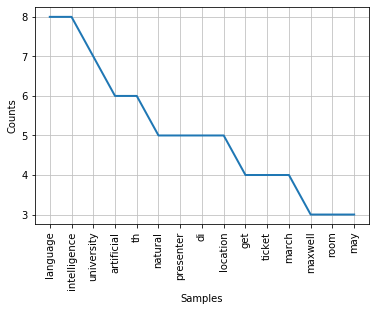

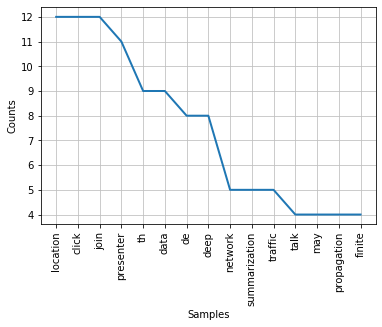

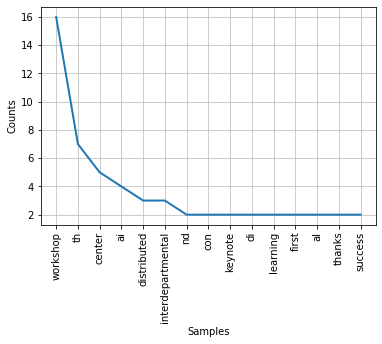

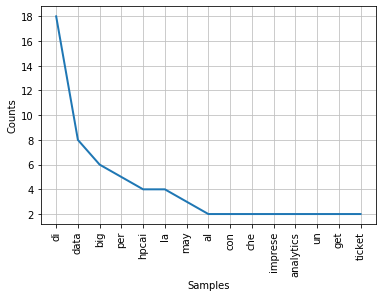

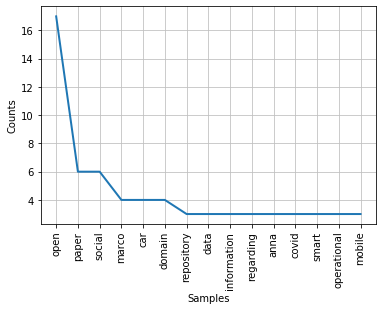

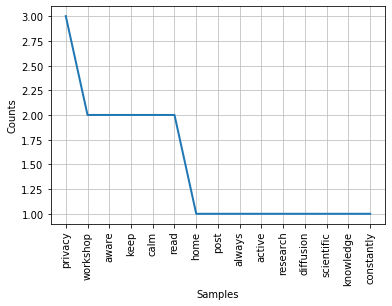

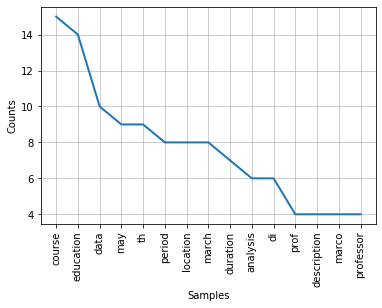

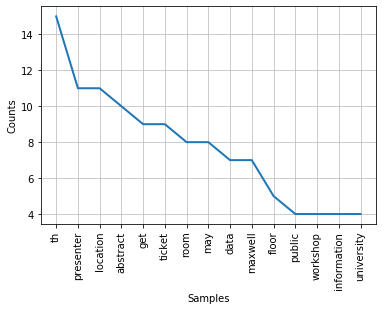

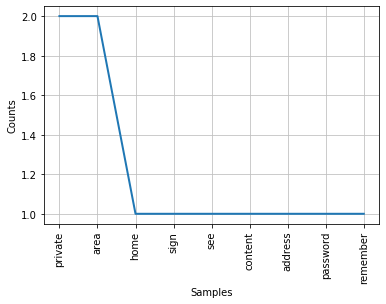

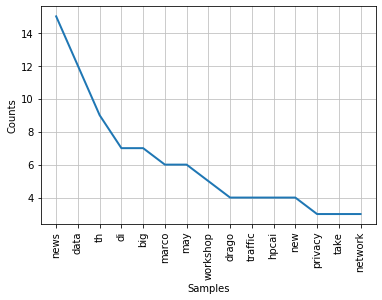

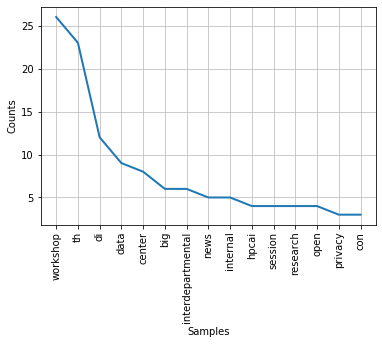

In [14]:
from nltk.probability import FreqDist

clean_texts=[]
for url in texts3[:]:
    clean = preprocessing(url)
    clean_texts.append(clean)
    
freq_word=[]
for url in clean_texts[:]:
    tokens=word_tokenize(url)
    fdist = FreqDist(tokens)
    #print(fdist.most_common(10))
    freq_word.append(fdist)
    
for url in freq_word[:]:
    url.plot(15,cumulative=False)
    plt.show()

In [15]:
#results = pd.DataFrame({'Title' : title, 'Freq_word' : freq_word}) 
#results

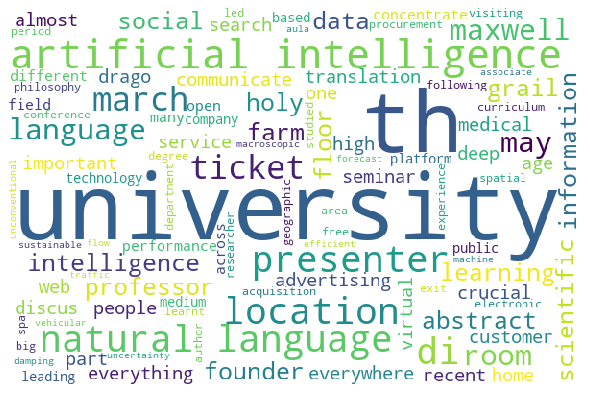

In [16]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(clean_texts[0]) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()

## Parole frequenti sul totale

In [17]:
tot_text = ''.join(map(str, clean_texts))
type(tot_text)

str

In [18]:
tot_text=' '.join( [w for w in tot_text.split() if len(w)>1] )
tot_text = ''.join(i for i in tot_text if not i.isdigit())

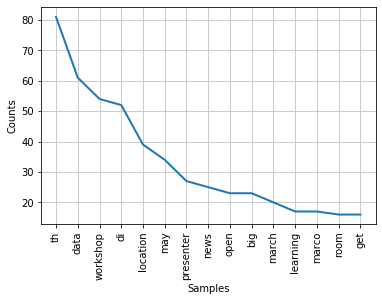

In [19]:
tokens=word_tokenize(tot_text)
fdist = FreqDist(tokens)

fdist.plot(15,cumulative=False)
plt.show()

**salvo la stringa contenente il contenuto di tutte le pagine del sito in un file a parte**

In [20]:
textfile = open('PoliTo.txt', 'w')
textfile.write(tot_text)
textfile.close()

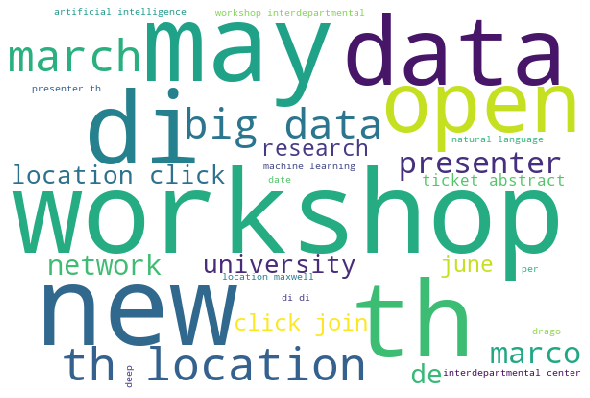

In [21]:
from wordcloud import WordCloud
wordcloud = WordCloud(width = 600, height = 400, 
                background_color ='white',  
                min_font_size = 10).generate(tot_text) 
  
                       
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show()